
# RSVP Concepts Demonstration Notebook

This notebook provides minimal, illustrative code snippets and conceptual demonstrations
related to the RSVP framework discussed in your essay, including:

- scalar (Φ), vector (𝒗), and entropy (S) fields  
- simple lamphrodynamic flows  
- small simulation examples on a 2D grid  
- basic spectral / coherence diagnostics  

This is **not** a full simulator, but a compact playground you can expand.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# no specific color choice



## Define Scalar, Vector, and Entropy Fields

We create a small 2D grid and initialize:
- Φ(x, y): scalar potential
- 𝒗(x, y): vector field (vx, vy)
- S(x, y): entropy field



In [2]:

N = 64
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X, Y = np.meshgrid(x,y)

# scalar potential: simple Gaussian well
Phi = np.exp(-(X**2 + Y**2)*5)

# vector field: rotational flow
vx = -Y
vy = X
V = np.stack([vx, vy], axis=-1)

# entropy field: slight gradient
S = 0.5 + 0.5*X



## Visualizing the Fields

Simple plots to inspect Φ and S.


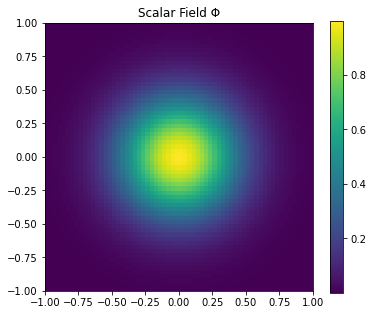

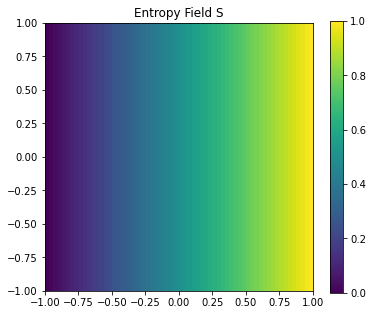

In [3]:

plt.figure(figsize=(6,5))
plt.imshow(Phi, origin='lower', extent=(-1,1,-1,1))
plt.colorbar()
plt.title("Scalar Field Φ")
plt.show()

plt.figure(figsize=(6,5))
plt.imshow(S, origin='lower', extent=(-1,1,-1,1))
plt.colorbar()
plt.title("Entropy Field S")
plt.show()



## Simple Lamphrodynamic Relaxation Step

We implement a minimal illustrative relaxation step:

Φ_{t+1} = Φ_t + α ∇·𝒗  
S_{t+1} = S_t + β ΔS  

where α, β are small coefficients.

This is **toy physics** made for demonstration.


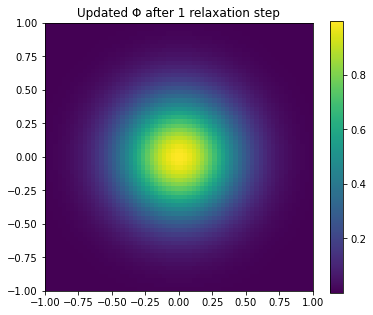

In [4]:

alpha = 0.01
beta = 0.02

def laplacian(F):
    return (
        -4*F
        + np.roll(F,1,0) + np.roll(F,-1,0)
        + np.roll(F,1,1) + np.roll(F,-1,1)
    )

# Divergence of V
divV = (np.roll(vx,-1,1) - np.roll(vx,1,1))/2 + (np.roll(vy,-1,0) - np.roll(vy,1,0))/2

Phi_new = Phi + alpha * divV
S_new = S + beta * laplacian(S)

Phi, S = Phi_new, S_new

plt.figure(figsize=(6,5))
plt.imshow(Phi, origin='lower', extent=(-1,1,-1,1))
plt.colorbar()
plt.title("Updated Φ after 1 relaxation step")
plt.show()
